# Kaggle Project

## Day 1


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.getcwd())
filename = '/Users/dongjingwen/Desktop/KaggleProject/data-sales/sales_train.csv'

/Users/dongjingwen/Desktop/KaggleProject


### Load data from csv file into pandas dataframe

In [4]:
df_sales_train = pd.read_csv(filename,engine='python')
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [5]:
df_sales_train.shape

(2935849, 6)

## Show outliers on plots

### Create catterplot and label outliers

<ipython-input-5-58d95d5ec0fb>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))


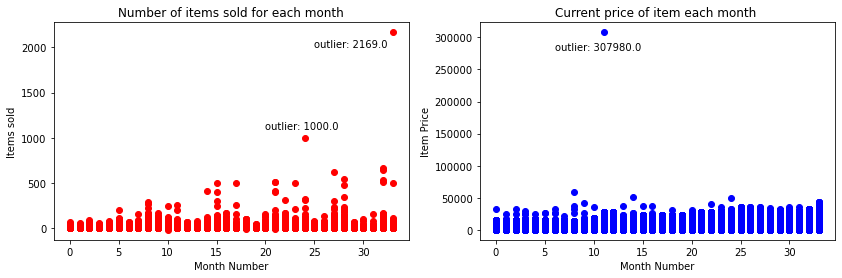

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14,4))

ax1.scatter(df_sales_train['date_block_num'],df_sales_train['item_cnt_day'],color='red')
ax1.set_xlabel('Month Number')
ax1.set_ylabel('Items sold')
ax1.set_title('Number of items sold for each month')
ax1.text(20,1100,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>900][df_sales_train['item_cnt_day']<1500].index[0]]))
ax1.text(25,2000,'outlier: '+str(df_sales_train['item_cnt_day'][df_sales_train[df_sales_train['item_cnt_day']>1800].index[0]]))

ax2.scatter(df_sales_train['date_block_num'],df_sales_train['item_price'],color='blue')
ax2.set_xlabel('Month Number')
ax2.set_ylabel('Item Price')
ax2.set_title('Current price of item each month ')
ax2.text(6,280000,'outlier: '+str(df_sales_train['item_price'][df_sales_train[df_sales_train['item_price']>250000].index[0]]))

plt.show()

### Identify outliers on boxplot

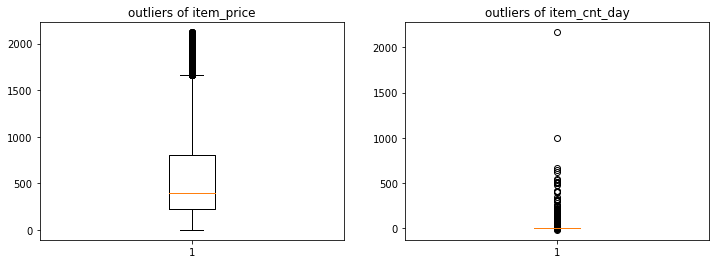

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(12,4))

ax1.boxplot(df_sales_train['item_price'])
ax1.set_title('outliers of item_price')
ax2.boxplot(df_sales_train['item_cnt_day'])
ax2.set_title('outliers of item_cnt_day')
plt.show()

In [6]:
def outlier(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q_range = q3-q1
    lower = q1 - q_range*1.5
    upper = q3 + q_range*1.5
    df_out = df[df[column]>=lower]
    df_out = df[df[column]<=upper]
    return df_out

In [8]:
#df_here=df_sales_train
#df_here=outlier(df_here,'item_price').sort_values(by='item_price')
#df_here=outlier(df_here,'item_cnt_day').sort_values(by='item_cnt_day')

df_sales_train=outlier(df_sales_train,'item_price')
df_sales_train=outlier(df_sales_train,'item_cnt_day')
df_sales_train.shape

(2308417, 6)

## Aggregate sales_train from daily to monthly level

In [6]:
df_monthly=df_sales_train.groupby(['date_block_num','shop_id','item_id'],as_index=False).agg(
    {'item_price':'mean','item_cnt_day':'sum'}).rename(columns={'item_price':'avg_item_price','item_cnt_day':'item_cnt_month'})
df_monthly.sort_values(by=['date_block_num','item_id','shop_id']).head()

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
23161,0,25,19,28.0,1.0
2385,0,1,27,1890.0,1.0
3920,0,2,27,2499.0,1.0
10376,0,10,27,1890.0,1.0
17593,0,19,27,2499.0,1.0


In [269]:
df_monthly.sort_values(by='item_id')

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
1101022,20,54,0,58.0,1.0
1015412,18,55,1,4490.0,1.0
1061583,19,55,1,4490.0,1.0
877718,15,55,1,4490.0,2.0
1102844,20,55,1,4490.0,1.0
...,...,...,...,...,...
167027,2,43,22168,798.5,1.0
473482,8,12,22168,799.0,1.0
11463,0,12,22168,799.0,1.0
107745,1,42,22168,799.0,1.0


# Day 2

### Pirck 10 random items

In [7]:
random_10 = df_monthly[['item_id']].sample(n=10)
random_10

,item_id
1069878,9397
1523706,18109
1414556,9797
1415690,8237
128587,13517
780392,5664
1473171,16195
1447491,18923
1347930,1471
1363303,13573


In [8]:
df_random_10 = df_monthly[df_monthly['item_id'].isin(random_10['item_id'])].reset_index()
df_random_10 = df_random_10.groupby(by=['item_id','date_block_num'],as_index = False).agg({'avg_item_price':'mean','item_cnt_month':'sum'})

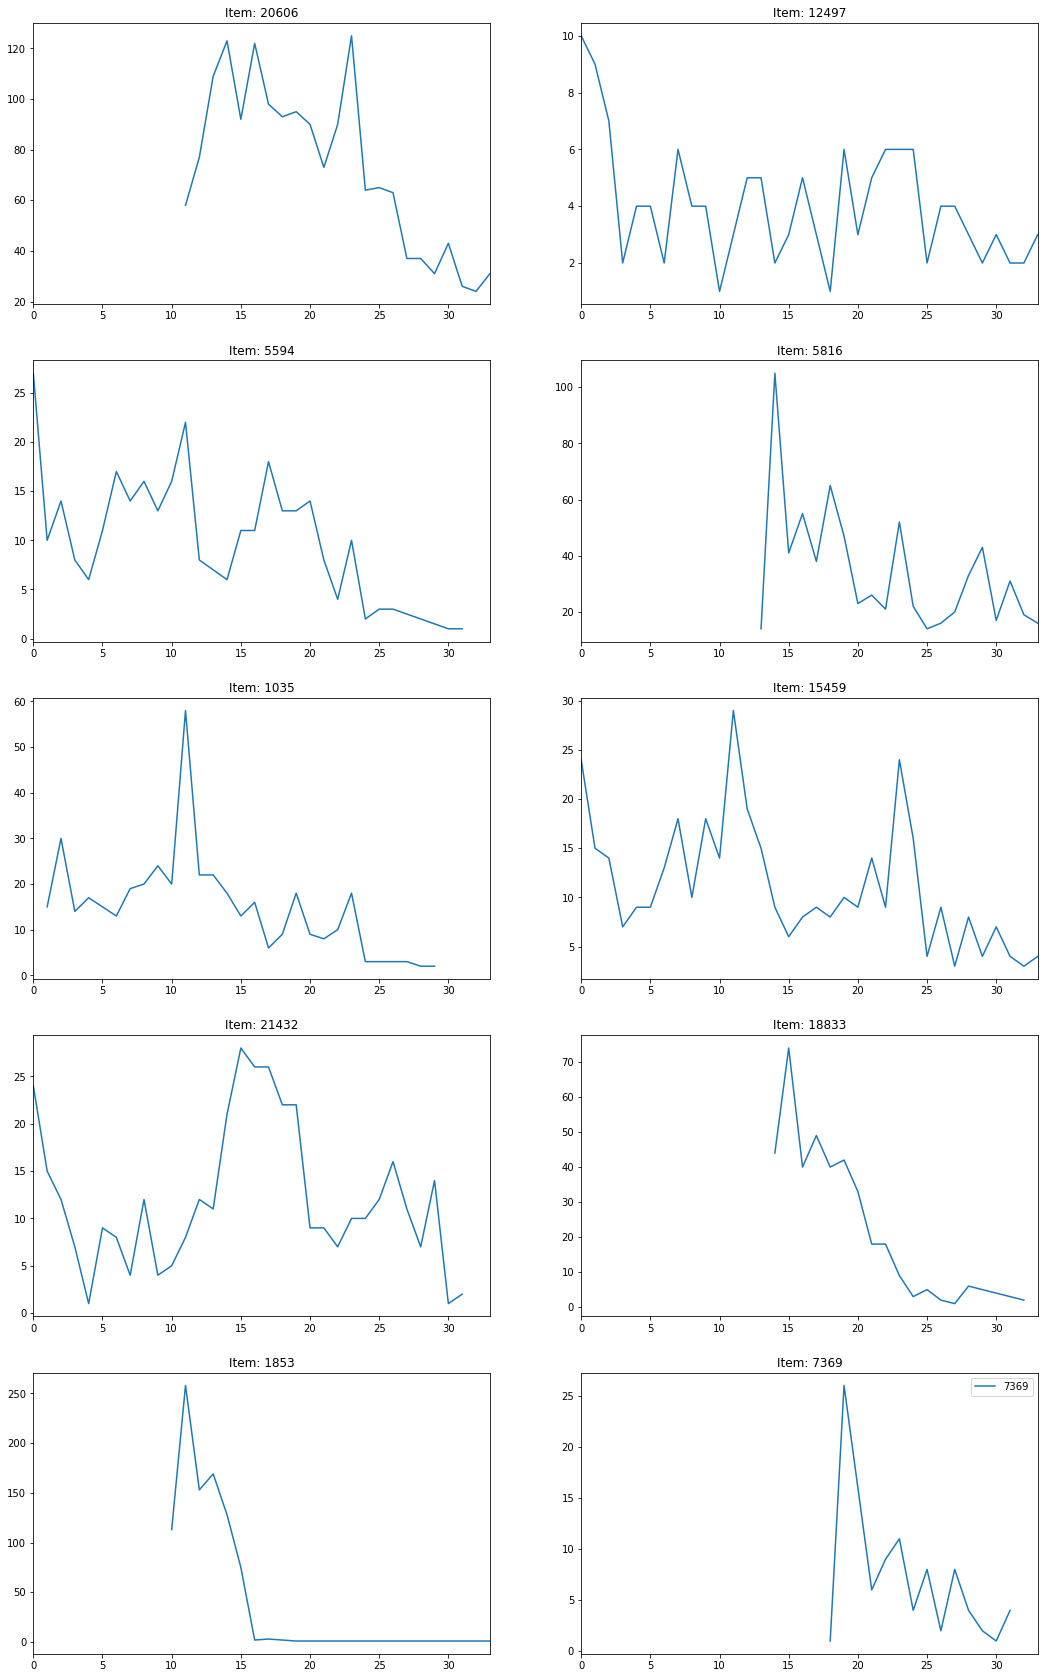

In [14]:
fig, axs = plt.subplots(5,2, figsize=(18,30))

for i,item_id in enumerate(random_10['item_id'].unique()):
    item = df_random_10[df_random_10['item_id']==item_id]
    axs[i%5,i%2].plot(item['date_block_num'],item['item_cnt_month'],label=item_id)
    axs[i%5,i%2].set_xlim([0,33])
    axs[i%5,i%2].set_title('Item: '+str(item_id))
plt.legend()
plt.show()


### Reformat

In [9]:
df_monthly_reformat = pd.pivot_table(df_monthly, values=('item_cnt_month'),index=['shop_id','item_id'],columns = 'date_block_num').reset_index()
df_monthly_reformat = df_monthly_reformat.fillna(0)
df_monthly_reformat = df_monthly_reformat.rename_axis(None,axis=1)
df_monthly_reformat = df_monthly_reformat.sort_values(by=['item_id','shop_id']).reset_index().drop(columns='index')

In [10]:
#df_monthly_train = df_monthly_reformat.groupby('item_id',as_index= False).sum()
#df_monthly_train.drop(columns = ['shop_id'],inplace = True)
tmp2 = df_monthly_reformat
tmp2

,shop_id,item_id,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,32,33
0,54,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,54,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,54,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424119,12,22168,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424120,16,22168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424121,42,22168,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424122,43,22168,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression Model

In [11]:
X = df_monthly_reformat.drop(columns = ['item_id','shop_id',33])
y = df_monthly_reformat[33].to_numpy()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.linear_model import LinearRegression
LRmodel = LinearRegression()




In [12]:
LRmodel.fit(X_train,y_train)
LRmodel.score(X_test,y_test)

-0.0945076461210006

In [13]:
y_pred = LRmodel.predict(X_test)
y_pred

array([-0.05708193,  1.12623814,  0.26147741, ...,  0.07420057,
        0.19232398,  0.94285105])

In [81]:
y_test

array([0., 0., 0., ..., 0., 0., 0.])

# Day 3

## Feature Engineering

### Shop


In [14]:
df_shop = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/shops.csv')
df_shop.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


City & dummy encoding

In [15]:
df_shop['city'] = df_shop['shop_name'].str.split().str[0]
df_shop['city_Label'] = df_shop['city'].astype('category').cat.codes
df_shop.head()

,shop_name,shop_id,city,city_Label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3


In [16]:
#def in_op_type()
df_shop['op_type']="Null"
op_list = ['мтрц','трц','трк','тц','тк']
for item in op_list:
    df_shop.loc[df_shop['shop_name'].str.contains(item.upper()),'op_type'] = item.upper()
    
# dummy encoding    
df_shop['op_type_Label'] = df_shop['op_type'].astype('category').cat.codes
df_shop.head()

,shop_name,shop_id,city,city_Label,op_type,op_type_Label
0,"!Якутск Орджоникидзе, 56 фран",0,!Якутск,0,Null,0
1,"!Якутск ТЦ ""Центральный"" фран",1,!Якутск,0,ТЦ,4
2,"Адыгея ТЦ ""Мега""",2,Адыгея,1,ТЦ,4
3,"Балашиха ТРК ""Октябрь-Киномир""",3,Балашиха,2,ТРК,2
4,"Волжский ТЦ ""Волга Молл""",4,Волжский,3,ТЦ,4


### Item

In [17]:
df_item = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/items.csv')
df_item.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


Item Name & Dummy Encoding

In [18]:
df_item['name_s1'] = '0'
df_item['name_s2'] = '0'
df_item['name_s3'] = '0'

In [19]:
# separate name 1 & 3
split_13_result = df_item['item_name'].str.split('(').str
df_item.loc[split_13_result.len()==2,'name_s1'] = split_13_result[0]
df_item.loc[split_13_result.len()==2,'name_s3'] = split_13_result[1]
df_item['name_s3'] = df_item['name_s3'].str.split().str[0]

# separate name 1 & 2
split_12_result = df_item['item_name'].str.split('[').str
df_item.loc[split_12_result.len()==2,'name_s1'] = split_12_result[0]
df_item.loc[split_12_result.len()==2,'name_s2'] = split_12_result[1]

# 
#df_item['name_s1'] = df_item['name_s1'].str.replace('[A-Za-z0-9]+', ' ').str.lower()
#df_item['name_s2'] = df_item['name_s2'].str.replace('[A-Za-z0-9]+', ' ').str.lower()
#df_item['name_s3'] = df_item['name_s3'].str.replace('[A-Za-z0-9]+', ' ').str.lower()

# dummy encoding
df_item['name_s1_label'] = df_item['name_s1'].astype('category').cat.codes
df_item['name_s2_label'] = df_item['name_s2'].astype('category').cat.codes
df_item['name_s3_label'] = df_item['name_s3'].astype('category').cat.codes

df_item.head()

,item_name,item_id,item_category_id,name_s1,name_s2,name_s3,name_s1_label,name_s2_label,name_s3_label
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40,! ВО ВЛАСТИ НАВАЖДЕНИЯ,0,ПЛАСТ.),0,4,616
1,!ABBYY FineReader 12 Professional Edition Full...,1,76,!ABBYY FineReader 12 Professional Edition Full,"PC, Цифровая версия]",0,1,58,12
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40,***В ЛУЧАХ СЛАВЫ,0,UNV),2,4,481
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40,***ГОЛУБАЯ ВОЛНА,0,Univ),3,4,483
4,***КОРОБКА (СТЕКЛО) D,4,40,***КОРОБКА,0,СТЕКЛО),4,4,643


### Item Category

In [20]:
df_item_category = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/item_categories.csv')
df_item_category.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


Item Category Name & Dummy Encoding

In [21]:
df_item_category['type']= df_item_category['item_category_name']
df_item_category['subtype'] = df_item_category['item_category_name']

type_split = df_item_category['item_category_name'].str.split('-').str
df_item_category.loc[type_split.len()==2,'type']=type_split[0]
df_item_category.loc[type_split.len()==2,'subtype']=type_split[1]

df_item_category.head()

,item_category_name,item_category_id,type,subtype
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники
1,Аксессуары - PS2,1,Аксессуары,PS2
2,Аксессуары - PS3,2,Аксессуары,PS3
3,Аксессуары - PS4,3,Аксессуары,PS4
4,Аксессуары - PSP,4,Аксессуары,PSP


In [22]:
# dummy encoding
df_item_category['type_label']  = df_item_category['type'].astype('category').cat.codes
df_item_category['subtype_label']=df_item_category['subtype'].astype('category').cat.codes
df_item_category.head()

,item_category_name,item_category_id,type,subtype,type_label,subtype_label
0,PC - Гарнитуры/Наушники,0,PC,Гарнитуры/Наушники,0,27
1,Аксессуары - PS2,1,Аксессуары,PS2,1,8
2,Аксессуары - PS3,2,Аксессуары,PS3,1,9
3,Аксессуары - PS4,3,Аксессуары,PS4,1,10
4,Аксессуары - PSP,4,Аксессуары,PSP,1,12


# Day 4

In [128]:
test = pd.read_csv('/Users/dongjingwen/Desktop/KaggleProject/data-sales/test.csv')
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [129]:
test.shape

(214200, 3)

## 1. Remove Shop Id not existed in test data

In [130]:
df_train = df_monthly[df_monthly['shop_id'].isin(test['shop_id'])]
df_train

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
3920,0,2,27,2499.0,1.0
3921,0,2,33,499.0,1.0
3922,0,2,317,299.0,1.0
3923,0,2,438,299.0,1.0
3924,0,2,471,399.0,2.0
...,...,...,...,...,...
1609119,33,59,22087,119.0,6.0
1609120,33,59,22088,119.0,2.0
1609121,33,59,22091,179.0,1.0
1609122,33,59,22100,629.0,1.0


## 2. cartesian_product

In [131]:
def cartesian_product(month,shop,item):
    month['key']=1
    shop['key']=1
    item['key']=1
    df_out = pd.merge(month, shop,on='key')
    df_out = pd.merge(df_out, item,on='key').drop(columns='key')
    return df_out

In [132]:
month= pd.DataFrame(df_train['date_block_num'].unique())
shop = pd.DataFrame(df_train['shop_id'].unique())
item = pd.DataFrame(df_train['item_id'].unique())

df_master = cartesian_product(month,shop,item).rename(columns={'0_x':'date_block_num','0_y':'shop_id',0:'item_id'})
df_master  

,date_block_num,shop_id,item_id
0,0,2,27
1,0,2,33
2,0,2,317
3,0,2,438
4,0,2,471
...,...,...,...
29995135,33,36,12733
29995136,33,36,13092
29995137,33,36,16797
29995138,33,36,18060


## 3. Left join master dataframe & aggregated monthly table

In [133]:
df_master = pd.merge(df_master, df_monthly, on = ['date_block_num','shop_id','item_id'], how = 'left')
df_master = df_master.fillna(0)
df_master

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,0,2,27,2499.0,1.0
1,0,2,33,499.0,1.0
2,0,2,317,299.0,1.0
3,0,2,438,299.0,1.0
4,0,2,471,399.0,2.0
...,...,...,...,...,...
29995135,33,36,12733,0.0,0.0
29995136,33,36,13092,0.0,0.0
29995137,33,36,16797,0.0,0.0
29995138,33,36,18060,0.0,0.0


## 4. Add month 34 to master dataframe 

In [134]:
test['date_block_num']=34
test = test.drop(columns='ID')
df_master = df_master.append(test).fillna(0)
df_master

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month
0,0,2,27,2499.0,1.0
1,0,2,33,499.0,1.0
2,0,2,317,299.0,1.0
3,0,2,438,299.0,1.0
4,0,2,471,399.0,2.0
...,...,...,...,...,...
214195,34,45,18454,0.0,0.0
214196,34,45,16188,0.0,0.0
214197,34,45,15757,0.0,0.0
214198,34,45,19648,0.0,0.0


## 5. Three feature tables

In [135]:
df_shop['name_label'] = df_shop['shop_name'].astype('category').cat.codes

# feature tables
shop_fe = df_shop[['shop_id','city_Label','name_label','op_type_Label']]
item_fe = df_item[['item_id','item_category_id', 'name_s1_label','name_s2_label', 'name_s3_label']]
item_category_fe = df_item_category[['item_category_id','type_label','subtype_label']]

# left join
df_master = pd.merge(df_master,shop_fe, on='shop_id', how = 'left')
df_master = pd.merge(df_master,item_fe, on='item_id', how = 'left')
df_master = pd.merge(df_master,item_category_fe, on='item_category_id', how = 'left')

df_master.columns

Index(['date_block_num', 'shop_id', 'item_id', 'avg_item_price',
       'item_cnt_month', 'city_Label', 'name_label', 'op_type_Label',
       'item_category_id', 'name_s1_label', 'name_s2_label', 'name_s3_label',
       'type_label', 'subtype_label'],
      dtype='object')

In [136]:
df_master.head()

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35


## 5. calculation for new features

### - last month sales for each items

In [137]:
#df_master['item_lastmonth'] = 

item_last_month = df_master.groupby(['date_block_num','item_id'], as_index = False).agg({'item_cnt_month':'sum'})
item_last_month['date_block_num'] = item_last_month['date_block_num']+1
item_last_month.columns = ['date_block_num','item_id','item_last_month']
item_last_month

,date_block_num,item_id,item_last_month
0,1,1,0.0
1,1,16,0.0
2,1,17,0.0
3,1,18,0.0
4,1,19,1.0
...,...,...,...
719265,35,22162,0.0
719266,35,22163,0.0
719267,35,22164,0.0
719268,35,22166,0.0


In [138]:
master_temp = df_master
master_temp = master_temp.merge(item_last_month, on = ['date_block_num','item_id'],how = 'left')
master_temp

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label,item_last_month
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9,NaN
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60,NaN
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22,NaN
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22,NaN
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,45,4,55,13,4,12,16,1,2.0
30209336,34,45,16188,0.0,0.0,21,45,4,64,13,4,12,17,38,1.0
30209337,34,45,15757,0.0,0.0,21,45,4,55,13,4,12,16,1,5.0
30209338,34,45,19648,0.0,0.0,21,45,4,40,8667,4,633,11,3,2.0


### - last month sales for each shop

In [141]:
shop_last_month = df_master.groupby(['date_block_num','shop_id'], as_index = False).agg({'item_cnt_month':'sum'})
shop_last_month['date_block_num'] = shop_last_month['date_block_num']+1
shop_last_month.columns = ['date_block_num','shop_id','shop_last_month']
shop_last_month

,date_block_num,shop_id,shop_last_month
0,1,2,1146.0
1,1,3,767.0
2,1,4,2114.0
3,1,5,0.0
4,1,6,3686.0
...,...,...,...
1465,35,55,0.0
1466,35,56,0.0
1467,35,57,0.0
1468,35,58,0.0


In [142]:
master_temp = master_temp.merge(shop_last_month, on = ['date_block_num','shop_id'],how = 'left')
master_temp

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label,item_last_month,shop_last_month
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9,NaN,NaN
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60,NaN,NaN
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22,NaN,NaN
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22,NaN,NaN
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,45,4,55,13,4,12,16,1,2.0,702.0
30209336,34,45,16188,0.0,0.0,21,45,4,64,13,4,12,17,38,1.0,702.0
30209337,34,45,15757,0.0,0.0,21,45,4,55,13,4,12,16,1,5.0,702.0
30209338,34,45,19648,0.0,0.0,21,45,4,40,8667,4,633,11,3,2.0,702.0


### - last month sales for name1

In [146]:
name1_last_month = df_master.groupby(['date_block_num','name_s1_label'], as_index = False).agg({'item_cnt_month':'sum'})
name1_last_month['date_block_num'] = name1_last_month['date_block_num']+1
name1_last_month.columns = ['date_block_num','name_s1_label','shop_last_month']

master_temp = master_temp.merge(name1_last_month, on = ['date_block_num','name_s1_label'],how = 'left')
master_temp

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label,item_last_month,shop_last_month_x,shop_last_month_y
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9,NaN,NaN,NaN
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60,NaN,NaN,NaN
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22,NaN,NaN,NaN
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22,NaN,NaN,NaN
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,45,4,55,13,4,12,16,1,2.0,702.0,24359.0
30209336,34,45,16188,0.0,0.0,21,45,4,64,13,4,12,17,38,1.0,702.0,24359.0
30209337,34,45,15757,0.0,0.0,21,45,4,55,13,4,12,16,1,5.0,702.0,24359.0
30209338,34,45,19648,0.0,0.0,21,45,4,40,8667,4,633,11,3,2.0,702.0,2.0


### - last month sales for item category

In [149]:
category_last_month = df_master.groupby(['date_block_num','item_category_id'], as_index = False).agg({'item_cnt_month':'sum'})
category_last_month['date_block_num'] = category_last_month['date_block_num']+1
category_last_month.columns = ['date_block_num','item_category_id','shop_last_month']

master_temp = master_temp.merge(category_last_month, on = ['date_block_num','item_category_id'],how = 'left')
master_temp

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label,item_last_month,shop_last_month_x,shop_last_month_y,shop_last_month
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9,NaN,NaN,NaN,NaN
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60,NaN,NaN,NaN,NaN
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22,NaN,NaN,NaN,NaN
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22,NaN,NaN,NaN,NaN
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,45,4,55,13,4,12,16,1,2.0,702.0,24359.0,5808.0
30209336,34,45,16188,0.0,0.0,21,45,4,64,13,4,12,17,38,1.0,702.0,24359.0,866.0
30209337,34,45,15757,0.0,0.0,21,45,4,55,13,4,12,16,1,5.0,702.0,24359.0,5808.0
30209338,34,45,19648,0.0,0.0,21,45,4,40,8667,4,633,11,3,2.0,702.0,2.0,7680.0


In [ ]:
### - last month sales for each city

In [154]:
city_last_month = df_master.groupby(['date_block_num','city_Label'], as_index = False).agg({'item_cnt_month':'sum'})
city_last_month['date_block_num'] = city_last_month['date_block_num']+1
city_last_month.columns = ['date_block_num','city_Label','shop_last_month']

master_temp = master_temp.merge(city_last_month, on = ['date_block_num','city_Label'],how = 'left')
master_temp

,date_block_num,shop_id,item_id,avg_item_price,item_cnt_month,city_Label,name_label,op_type_Label,item_category_id,name_s1_label,name_s2_label,name_s3_label,type_label,subtype_label,item_last_month,shop_last_month_x,shop_last_month_y,shop_last_month_x,shop_last_month_y
0,0,2,27,2499.0,1.0,1,2,4,19,14,83,12,5,9,NaN,NaN,NaN,NaN,NaN
1,0,2,33,499.0,1.0,1,2,4,37,16,4,274,12,60,NaN,NaN,NaN,NaN,NaN
2,0,2,317,299.0,1.0,1,2,4,45,211,4,326,15,22,NaN,NaN,NaN,NaN,NaN
3,0,2,438,299.0,1.0,1,2,4,45,308,4,326,15,22,NaN,NaN,NaN,NaN,NaN
4,0,2,471,399.0,2.0,1,2,4,49,331,4,768,15,35,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30209335,34,45,18454,0.0,0.0,21,45,4,55,13,4,12,16,1,2.0,702.0,24359.0,5808.0,1481.0
30209336,34,45,16188,0.0,0.0,21,45,4,64,13,4,12,17,38,1.0,702.0,24359.0,866.0,1481.0
30209337,34,45,15757,0.0,0.0,21,45,4,55,13,4,12,16,1,5.0,702.0,24359.0,5808.0,1481.0
30209338,34,45,19648,0.0,0.0,21,45,4,40,8667,4,633,11,3,2.0,702.0,2.0,7680.0,1481.0
